# Riddler Classic

https://fivethirtyeight.com/features/how-many-phones-do-you-need-to-win-hq-trivia/

> From Kate Seely, a gaming problem to which she would very much like to know the answer:
> I have a matching game app for my 4-year-old daughter. There are 10 different pairs of cards, each pair depicting the same animal. That makes 20 cards total, all arrayed face down. The goal is to match all the pairs. When you flip two cards up, if they match, they stay up, decreasing the number of unmatched cards and rewarding you with the corresponding animal sound. If they don’t match, they both flip back down. (Essentially like [Concentration.](https://en.wikipedia.org/wiki/Concentration_(game))) However, my 1-year-old son also likes to play the game, exclusively for its animal sounds. He has no ability to match cards intentionally — it’s all random.
If he flips a pair of cards every second and it takes another second for them to either flip back over or to make the “matching” sound, how long should my daughter expect to have to wait before he finishes the game and it’s her turn again?

## Solution

Consider a more general case of $n$ pairs (hence a total of $2n$ cards). The probability of getting a "hit", i.e. a flip with matching pairs starting with $n$ pairs is given by:

\begin{align*}
p_n &= \frac{{n \choose 1}}{2n \choose 2} \\
&= \frac{1}{2n-1}
\end{align*}

The number of tries till a first "hit" follows a geometric disribution. (Think of a coin toss experiment where the we are studying the distribution of number of heads till the first tail appears $P(X=k) = p^k(1-p)$. Then the mean is given by $EX = \frac{1}{p}$.

Thus, it will take $2n-1$ picks to get a "hit" on average starting with $2n$ cards. Similarly, it will take $2n-3$ picks starting with $2n-2$ cards and so on.

Hence number of picks when the player is playing randomly:
$$
(2n-1) + (2n-3) + \dots + 3 + 1 = n^2
$$

We verify this solution with simulation below where we simulate picks for $n=[10, 20, 30, 40, 50]$

In [1]:
%pylab inline
import seaborn as sns
from collections import defaultdict

sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(42)
iterations = 1000
N = np.arange(10, 51, 10)
n_tries_arr = defaultdict(list)
for n in N:
    print (n)
    for iteration in range(0, iterations):
        sample_universe = list(range(1, n+1)) + list(range(1, n+1))
        n_tries = 0
        while sample_universe:
            samples = np.random.choice(sample_universe, size=2, replace=False)
            sample1, sample2 = samples
            if sample1 == sample2:
                sample_universe = list(filter(lambda a: a != sample1, sample_universe))
            n_tries += 1
        n_tries_arr[n].append(n_tries) 

10
20
30
40
50


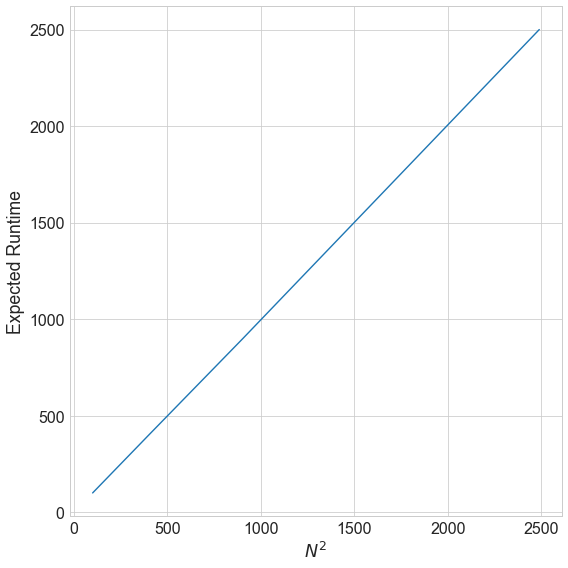

In [3]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot([np.mean(n_tries_arr[x]) for x in N], np.array(N)**2 )
ax.set_xlabel('$N^2$')
ax.set_ylabel('Expected Runtime')
fig.tight_layout()